## V01 Lebensdauer kosmischer Myonen

In [1]:
%config InlineBackend.figure_formats = ['svg']

from IPython.display import display

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as df 
import scipy.constants as const
from scipy.optimize import curve_fit as fit
from scipy.signal import find_peaks as peaks
import uncertainties.unumpy as unp
import uncertainties.umath as um
from uncertainties.unumpy import uarray as uar, nominal_values as noms, std_devs as stds
from uncertainties import ufloat as u

import warnings
#warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=[8,5]
plt.rcParams['figure.constrained_layout.use']=True
plt.rcParams['legend.frameon']=False
plt.rcParams["xtick.minor.visible"]=True
plt.rcParams["ytick.minor.visible"]=True

#### Delay

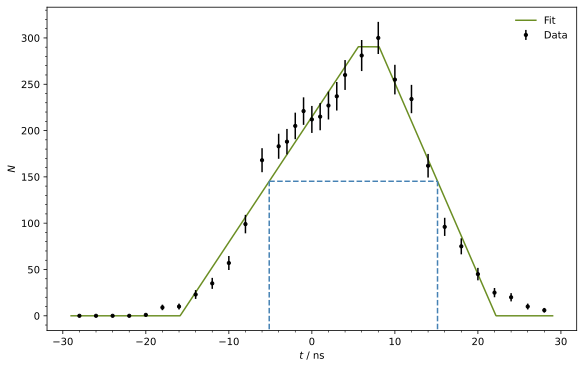

a = 13.5+/-0.8 1/ns
b = -15.9+/-0.8 ns
c = 5.6+/-1.1 ns
d = 8.1+/-0.9 ns
e = 22.2+/-0.5 ns

t1 = -5.1+/-0.7 ns
t2 = 15.1+/-0.5 ns

dt = 20.3+/-0.8 ns

DT = 2.5+/-1.4 ns

T = 17.8+/-0.8 ns


In [5]:
t, N = np.genfromtxt('data/test/delay.txt', unpack=True)

def _plat(t, a, b, c, d, e):
    if t < b:
        return 0.0
    elif t < c:
        return a * (t - b)
    elif t < d:
        return a * (c - b)
    elif t < e:
        return a * (c - b) / (d - e) * (t - d) + a * (c - b)
    else:
        return 0.0

def plat(t, a, b, c, d, e):
    return np.vectorize(_plat)(t, a, b, c, d, e)

par, cov = fit(plat, t, N, p0=[20, -15, -3, 12, 23])
err = np.sqrt(np.diag(cov))

aa, bb, cc, dd, ee = uar(par, err)

t1 = (cc + bb) / 2
t2 = (ee + dd) / 2
dt = t2 - t1

DT = dd - cc

TT = dt - DT

tt = np.linspace(-29, 29, 1000)

plt.plot(tt, plat(tt, *par), c='olivedrab', label='Fit')
plt.errorbar(t, N, yerr=np.sqrt(N), fmt='k.', ms=6.42, label='Data', zorder=10)

plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

plt.plot([t1.n, t1.n], [-1e12, plat(t1.n, *par)], '--', c='steelblue')
plt.plot([t2.n, t2.n], [-1e12, plat(t2.n, *par)], '--', c='steelblue')
plt.plot([t1.n, t2.n], [plat(t1.n, *par), plat(t2.n, *par)], '--', c='steelblue')

plt.xlabel(r'$t$ / ns')
plt.ylabel(r'$N$')

plt.legend()

plt.savefig('build/delay.pdf')
plt.show()
plt.close()

print(f'a = {aa} 1/ns')
print(f'b = {bb} ns')
print(f'c = {cc} ns')
print(f'd = {dd} ns')
print(f'e = {ee} ns')
print('')
print(f't1 = {t1} ns')
print(f't2 = {t2} ns')
print('')
print(f'dt = {dt} ns')
print('')
print(f'DT = {DT} ns')
print('')
print(f'T = {TT} ns')

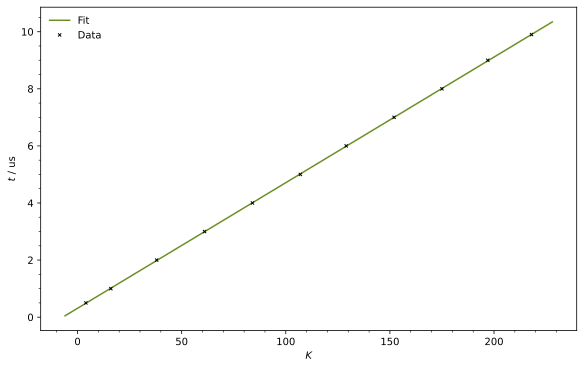

a = 0.04400+/-0.00006 us
b = 0.313+/-0.008 us


In [11]:
K, t = np.genfromtxt('data/test/calibration.txt', unpack=True)

par, cov = np.polyfit(K, t, deg=1, cov=True)
err = np.sqrt(np.diag(cov))
a, b = uar(par, err)

KK = np.linspace(K[0] - 10, K[-1] + 10, 2)

plt.plot(KK, a.n * KK + b.n, c='olivedrab', label='Fit')
plt.plot(K, t, 'kx', ms=3.21, label='Data')

plt.xlabel(r'$K$')
plt.ylabel(r'$t$ / us')

plt.legend()

plt.savefig('build/calibration.pdf')
plt.show()
plt.close()

print(f'a = {a} us')
print(f'b = {b} us')

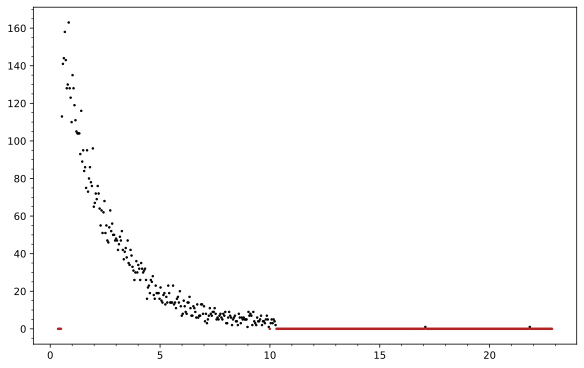

In [27]:
N = np.genfromtxt('data/test/lifetime.txt', unpack=True)
K = np.arange(1, len(N) + 1)

N = uar(N, np.sqrt(N))

t = a * K + b

#plt.errorbar(noms(t), noms(N), yerr=stds(N), xerr=stds(t), fmt='k,', ms=0)
plt.plot(noms(t[noms(N) != 0.0]), noms(N[noms(N) != 0.0]), 'k.', ms=3.21)
plt.plot(noms(t[noms(N) == 0.0]), noms(N[noms(N) == 0.0]), '.', ms=3.21, c='firebrick')